###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 0: Dataset Preprocessing

In [68]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp,sqrt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics.pairwise import nan_euclidean_distances
import scipy.spatial.distance

In [2]:
df_summary=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 7\DataSummary.csv",delimiter=',',header=None)
df_summary

,0,1,2,3,4,5,6,7,8,9,10,11
0,ID,Type,Name,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Data donor/editor
1,1,Image,Adiac,390,391,37,176,0.3887,0.3913 (3),0.3964,0.9591,A. Jalba
2,2,Image,ArrowHead,36,175,3,251,0.2000,0.2000 (0),0.2971,0.6057,L. Ye & E. Keogh
3,3,Spectro,Beef,30,30,5,470,0.3333,0.3333 (0),0.3667,0.8000,K. Kemsley & A. Bagnall
4,4,Image,BeetleFly,20,20,2,512,0.2500,0.3000 (7),0.3000,0.5000,J. Hills & A. Bagnall
...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,Spectrum,SemgHandMovementCh2,450,450,6,1500,0.6311,0.3622 (1),0.4156,0.8333,C.-C. M. Yeh
125,125,Spectrum,SemgHandSubjectCh2,450,450,5,1500,0.5956,0.2000 (3),0.2733,0.8000,C.-C. M. Yeh
126,126,Sensor,ShakeGestureWiimoteZ,50,50,10,Vary,0.4000,0.1600 (6),0.1400,0.9000,J. Guna
127,127,Simulated,SmoothSubspace,150,150,3,15,0.0933,0.0533 (1),0.1733,0.6667,X. Huang


#### 1. There are multiple datasets in this repository

In [3]:
rootdir = 'C:\\Users\\Sharon\\ML_LAB\\Lab 7\\UCRArchive_2018\\UCRArchive_2018'
dataframe_list=list()
counter=0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'tsv' in file:
            i=0
            if 'TEST.tsv' in file:
                i=1
                var1=str(os.path.join(subdir, file))
                print(var1)
                df_test=pd.read_csv(var1,delimiter='\t',header=None)
            if 'TRAIN.tsv' in file:
                i=2
                var2=str(os.path.join(subdir, file))
                print(var2)
                df_train=pd.read_csv(var2,delimiter='\t',header=None)
            if(i==2):
                dataframe_list.append(pd.concat([df_train,df_test]))              

C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\ACSF1\ACSF1_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\ACSF1\ACSF1_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Adiac\Adiac_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Adiac\Adiac_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteX\AllGestureWiimoteX_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteX\AllGestureWiimoteX_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteY\AllGestureWiimoteY_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteY\AllGestureWiimoteY_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteZ\AllGestureWiimoteZ_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\AllGestureWiimoteZ\AllGestureWiimoteZ_TRAIN.tsv
C:\Users\Sharon\ML_

C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\FreezerRegularTrain\FreezerRegularTrain_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\FreezerSmallTrain\FreezerSmallTrain_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\FreezerSmallTrain\FreezerSmallTrain_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Fungi\Fungi_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Fungi\Fungi_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\GestureMidAirD1\GestureMidAirD1_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\GestureMidAirD1\GestureMidAirD1_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\GestureMidAirD2\GestureMidAirD2_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\GestureMidAirD2\GestureMidAirD2_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\GestureMidAirD3\GestureMidAirD3_TEST.tsv

C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Phoneme\Phoneme_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PickupGestureWiimoteZ\PickupGestureWiimoteZ_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PickupGestureWiimoteZ\PickupGestureWiimoteZ_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigAirwayPressure\PigAirwayPressure_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigAirwayPressure\PigAirwayPressure_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigArtPressure\PigArtPressure_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigArtPressure\PigArtPressure_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigCVP\PigCVP_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PigCVP\PigCVP_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\PLAID\PLAID_TEST.tsv
C:\Users\Sharon\ML_

C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\WordSynonyms\WordSynonyms_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Worms\Worms_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Worms\Worms_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\WormsTwoClass\WormsTwoClass_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\WormsTwoClass\WormsTwoClass_TRAIN.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Yoga\Yoga_TEST.tsv
C:\Users\Sharon\ML_LAB\Lab 7\UCRArchive_2018\UCRArchive_2018\Yoga\Yoga_TRAIN.tsv


#### All 129 Datasets have been loaded in dataframe_list

In [4]:
len(dataframe_list)

128

#### This is just example. Real Split is done inside function for Each Dataset

In [6]:
X=dataframe_list[0].iloc[:,1:]
y=dataframe_list[0].iloc[:,0:1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[0][0])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15

#### Standardize the datasets, by removing the mean and scaling to unit-variance

In [8]:
for i in range(len(dataframe_list)):
    dataframe_list[i].iloc[:,1:]=(dataframe_list[i].iloc[:,1:]-dataframe_list[i].iloc[:,1:].mean())/dataframe_list[i].iloc[:,1:].std()
                      

#### Ignore multivariate datasets (if any)- Datasets with three axis like X,Y and Z are ignored .Rest All the Datasets are considered


#### If there are any datasets that do not have equal length samples, then pad the samples with 0s on the left.

In [12]:
dataframe_list_copy=dataframe_list.copy()
missing_value_datasets=list()
pad_value_datasets=list()
for i in range(len(dataframe_list)):
    if (dataframe_list[i].isna().sum().sum()!=0):
        if i in [25,26,27,71]: # DodgerLoopDay,DodgerLoopGame,DodgerLoopWeekend,MelbournePedestrain
            missing_value_datasets.append(dataframe_list[i]) 
        else:
            print("Dataset",i,"has unequal samples")
            pad_value_datasets.append(dataframe_list[i])
            dataframe_list_copy[i]=dataframe_list[i].replace(np.nan, 0)

Dataset 2 has unequal samples
Dataset 3 has unequal samples
Dataset 4 has unequal samples
Dataset 46 has unequal samples
Dataset 47 has unequal samples
Dataset 48 has unequal samples
Dataset 49 has unequal samples
Dataset 50 has unequal samples
Dataset 84 has unequal samples
Dataset 88 has unequal samples
Dataset 100 has unequal samples


#### From this we can understand 4 Datasets have Missing Values and Rest are features with unequal length samples. So 11 will be padded with zero. This is understood by readme summary file . When NaN values are checked there are 15 datasets with NaN values.

In [20]:
len(missing_value_datasets)

4

#### Only DodgerLoopDay, DodgerLoopGame, DodgerLoopWeekend, MelbournePedestrain Datasets have to be Imputed using KNN Algorithm and then Standardised and then Fed in KNN Classification Algorithm for Finding the Value of HyperParameter K

In [14]:
for i in range(len(dataframe_list_copy)):
    if (dataframe_list_copy[i].isna().sum().sum()!=0):
        print("Dataset",i,"has unequal samples")        

Dataset 25 has unequal samples
Dataset 26 has unequal samples
Dataset 27 has unequal samples
Dataset 71 has unequal samples


In [265]:
length_of_samples=[]
number_of_classes=[]
for i in range(len(dataframe_list_copy)):
    number_of_classes.append(len(dataframe_list_copy[i][0].unique()))
    length_of_samples.append(len(dataframe_list_copy[i])) 

KeyError: 0

In [264]:
dataframe_list_copy[26]

,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
0,-0.286905,-1.131913,-0.338384,1.050286,0.260175,-0.121832,-0.095827,0.888707,-0.650039,0.502203,...,-0.310111,-1.002456,-0.512527,-0.964225,-1.064827,-0.659368,-0.195188,-0.678192,1.075642,-0.154990
1,0.089206,0.448712,-0.595885,-0.049342,0.794218,0.729176,-0.394809,-0.207248,0.666923,-0.842753,...,-0.755543,-1.002456,-1.071005,-0.494741,-0.788339,0.075330,-0.692602,-0.207529,-0.061700,-0.523238
2,0.653371,2.255141,0.949124,1.050286,3.197412,2.998531,-0.693791,-0.207248,0.666923,2.183398,...,-0.532827,-0.560031,-0.289136,-0.494741,-1.064827,-0.512428,-0.941309,-0.521304,-1.036565,-0.523238
3,0.465316,0.222909,0.949124,1.325193,0.260175,0.445506,-0.394809,0.340730,0.666923,2.183398,...,0.246679,0.214212,-0.400832,-0.612112,-0.235364,0.075330,0.177873,0.576910,-0.386655,0.213258
4,0.653371,0.222909,0.949124,-0.049342,1.328261,2.147522,1.100099,0.888707,1.325405,0.165964,...,-1.200974,-0.781244,-0.512527,-0.142628,-0.788339,-0.218549,-0.443895,0.106247,-0.874087,0.029134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.593647,0.674516,0.434121,2.424820,0.794218,-0.689171,1.100099,1.710674,0.337683,1.847159,...,-0.866901,-0.560031,-0.177440,-0.964225,-0.926583,-0.953247,-0.070834,-0.521304,-0.874087,-1.075610
134,1.781702,0.900320,1.721629,1.600099,0.260175,0.161837,0.203154,-0.207248,2.313126,0.838442,...,1.471617,1.099062,-0.289136,0.913710,2.253023,1.397785,1.421409,1.518237,1.075642,2.790993
135,-0.286905,-0.454502,-0.595885,-0.874063,-0.273868,-0.972840,0.502136,-0.755225,-0.320799,0.838442,...,-0.532827,-0.560031,-0.735918,-0.377370,-0.097121,-0.218549,0.177873,-0.521304,-0.711610,-0.523238
136,1.029481,0.448712,0.691623,-0.049342,0.794218,-0.405502,1.399081,0.614718,1.654645,1.174681,...,-0.087395,-1.113063,-0.512527,-1.198966,0.455854,-0.512428,0.177873,-0.991968,-0.549133,-0.523238


In [262]:
for i in range(len(dataframe_list_copy)):
    print(i)
    number_of_classes.append(len(dataframe_list_copy[i][0].unique()))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


KeyError: 0

#### A plot indicating the total the length of samples

Text(0, 0.5, 'Length of Samples')

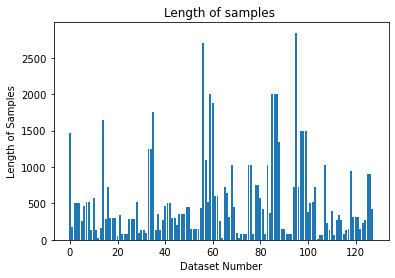

In [255]:
plt.bar(list(range(128)),length_of_samples)
plt.title("Length of samples ")
plt.xlabel("Dataset Number")
plt.ylabel("Length of Samples")

#### Similar to above show number of classes and number of samples

ValueError: shape mismatch: objects cannot be broadcast to a single shape

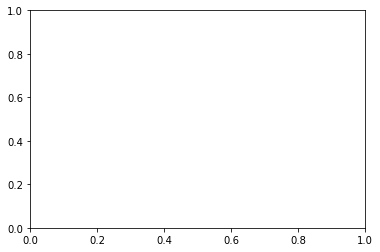

In [256]:
plt.bar(list(range(128)),number_of_classes)
plt.title("Number of classes \n")
plt.ylabel("Number of classes")
plt.xlabel("Dataset Number")


## Exercise 1: Dataset Imputation with KNN

#### We use 4 Datasets for Imputation

#### 2. For each dataset with missing values, and for each feature (timestep) of it that has missing values impute the value by calculating the mean of its nearest K neighbors. You need to tune the hyperparameter K via grid search. If in case there are multiple feature values missing, use the same K for all during such tuning.

In [30]:
# Code for Performing Imputation for Datasets with Missing Values
def perform_imputation(X,k):
    final_data=X.copy() #Final Dataframe with Imputed Values from All Neighbors
    arr=[]
    N,M=np.shape(X)
    print("Shape of X is Rows",N," Columns ",M)
    for i in range(N):
        for j in range(M):
            if(np.isnan(X.iloc[i,j])):
                arr.append([i,j])         
    for i,j in arr: #337 Times Loop
        row=i
        column=j
        print(" Row ",row," Column ",column)
        dist_arr=[]
        for m in range(len(X)): #Distance from all features #158 Times Loop
            if (i!=m): #Not Taking Distance with same row
                dist= euclidean_distance_with_nan(np.array(X.iloc[i,:]),np.array(X.iloc[m,:])) #nan euclidean distance weighted
                dist_arr.append(dist)
                
        dist_arr=np.array(dist_arr)
        
        values=np.argsort(dist_arr)[:k]
        print("Closest Values to Row i are",values)
        
        arr_values=[]
        for n in range(len(values)):
            if(np.isnan(X.iloc[values[n],column])):
                continue
            arr_values.append(X.iloc[values[n],column])
        
        print(arr_values)
        adjusted_value = np.mean(arr_values)
        print(adjusted_value)
        final_data.iloc[row,column] = adjusted_value
    return final_data

def euclidean_distance_with_nan(X,y):
    dist=0
    present_candidate=len(X)
    total_candidate=len(X)
    for i in range(len(X)): 
        if (np.isnan(X[i]) or np.isnan(y[i])):
            present_candidate-=1
            continue
        dist+= (X[i]-y[i])**2
    if (present_candidate==0):
        dist=dist*(total_candidate/1)
    else:
        dist=dist*(total_candidate/present_candidate)
    return sqrt(dist)
        

In [38]:
arr=[25,26,27,71]
t=0
for i in range(len(missing_value_datasets)):
    print(i)
    X=missing_value_datasets[i].iloc[:,1:]
    y=missing_value_datasets[i].iloc[:,0:1]
    print("Array of T " ,arr[t])
    dataframe_list_copy[arr[t]]=perform_imputation(X,3) #Here K is fixed to 3
    t+=1

0
Array of T  25
Shape of X is Rows 158  Columns  288
 Row  16  Column  89
Closest Values to Row i are [110  18 107]
[0.22094893385692443, 1.3827927658236734, 0.763142722108074]
0.7889614739295573
 Row  16  Column  90
Closest Values to Row i are [110  18 107]
[1.1942606776679834, 0.40882785424384593, 1.2728039600103973]
0.9586308306407423
 Row  16  Column  151
Closest Values to Row i are [110  18 107]
[1.0651848983159338, -0.9282716723113152, -0.6434921622217082]
-0.16885964540569656
 Row  16  Column  152
Closest Values to Row i are [110  18 107]
[-0.010691344794967037, -0.465559468799015, 1.0506676112144782]
0.19147226587349872
 Row  16  Column  153
Closest Values to Row i are [110  18 107]
[0.08892209149883488, -0.20622357390155344, 0.9743590876999998]
0.2856858684324271
 Row  16  Column  154
Closest Values to Row i are [110  18 107]
[0.025081031721007802, 0.4626056961874734, -0.9958098520340786]
-0.16937437470853248
 Row  16  Column  155
Closest Values to Row i are [110  18 107]
[-1

Closest Values to Row i are [31 48 35]
[0.9749708106329438, 1.2034341199902157, 0.28958088256112813]
0.8226619377280958
 Row  32  Column  184
Closest Values to Row i are [31 48 35]
[0.22148254588000882, 1.1612868621816672, 0.45643362495542344]
0.6130676776723666
 Row  32  Column  185
Closest Values to Row i are [31 48 35]
[-0.0605848155302414, 1.0658144521570123, 1.3161254005319576]
0.7737850123862429
 Row  32  Column  186
Closest Values to Row i are [31 48 35]
[-1.1231894597375738, 0.7767781650845035, -0.5294495769806746]
-0.29195362387791496
 Row  32  Column  187
Closest Values to Row i are [31 48 35]
[0.4781185893016907, 0.5928670507340965, -0.3251206407251501]
0.24862166643687908
 Row  32  Column  188
Closest Values to Row i are [31 48 35]
[0.513219368230006, 1.7313167899211401, -0.15119740723788527]
0.6977795836377535
 Row  32  Column  189
Closest Values to Row i are [31 48 35]
[-0.6719741999401435, -0.05654577416326059, 0.35373984302132805]
-0.12492671036069201
 Row  32  Column  

Closest Values to Row i are [117  39  53]
[-0.7549194589841833, -0.7549194589841833, -0.23716496277821686]
-0.5823346269155278
 Row  38  Column  49
Closest Values to Row i are [117  39  53]
[-0.16769124938384009, -0.16769124938384009, -0.16769124938384009]
-0.16769124938384009
 Row  38  Column  50
Closest Values to Row i are [117  39  53]
[-0.25009572984642875, -0.25009572984642875, -0.8286754033717493]
-0.4429556210215356
 Row  38  Column  51
Closest Values to Row i are [117  39  53]
[0.10736738347936726, -0.41269338024881774, -0.41269338024881774]
-0.23933979233942274
 Row  38  Column  52
Closest Values to Row i are [117  39  53]
[2.0674919539968553, -0.23798468535215614, -1.390723005026662]
0.1462614212060124
 Row  38  Column  53
Closest Values to Row i are [117  39  53]
[-0.6870427187814317, -1.1902289353537479, -1.1902289353537479]
-1.0225001964963092
 Row  38  Column  54
Closest Values to Row i are [117  39  53]
[-0.9058415055567283, 0.7764355761914814, -0.9058415055567283]
-0.34

Closest Values to Row i are [109  61 133]
[-0.4241636187332735, 0.33153018475704105, 0.33153018475704105]
0.07963225026026953
 Row  50  Column  65
Closest Values to Row i are [109  61 133]
[-0.8141178047350732, 0.06422275025752329, 0.06422275025752329]
-0.22855743474000886
 Row  50  Column  67
Closest Values to Row i are [109  61 133]
[0.11659505738441468, -0.11216739697741156, 0.34535751174624096]
0.11659505738441471
 Row  50  Column  69
Closest Values to Row i are [109  61 133]
[0.05466260616673568, -0.3586400258256573, 0.46796523815912866]
0.05466260616673568
 Row  50  Column  75
Closest Values to Row i are [109  61 133]
[0.22728475266537487, 0.05572847300929861, -0.11582780664677766]
0.0557284730092986
 Row  50  Column  76
Closest Values to Row i are [109  61 133]
[1.2880809216365618, -0.6665459639100724, 0.5363013502724717]
0.3859454359996537
 Row  50  Column  78
Closest Values to Row i are [109  61 133]
[0.5082042374975748, -0.13524790191467745, -0.2639383297971279]
0.03633933526

Closest Values to Row i are [137  49 112]
[-0.20001981153859807, 1.015685017033661, 0.4753717598904348]
0.43034565512849926
 Row  62  Column  130
Closest Values to Row i are [137  49 112]
[0.19600683350073625, 1.0187081615576385, -1.4493958226130685]
-0.07822694251823122
 Row  62  Column  131
Closest Values to Row i are [137  49 112]
[1.7703775410984188, 1.9142207163126652, 0.3319457889559534]
1.338848015455679
 Row  62  Column  132
Closest Values to Row i are [137  49 112]
[-1.6809920741373072, 0.3838485838581255, -0.09265310644851281]
-0.4632655322425649
 Row  62  Column  133
Closest Values to Row i are [137  49 112]
[0.01785140327688088, -1.447013747973054, -0.14491139130644523]
-0.5246912453342062
 Row  62  Column  134
Closest Values to Row i are [137  49 112]
[0.6742689014340575, -0.717898065644497, -0.8725832842087807]
-0.3054041494730734
 Row  62  Column  159
Closest Values to Row i are [137  49 112]
[0.12639759678005671, -1.0260510797439872, 0.29103312199777726]
-0.202873453655

Closest Values to Row i are [78 82  7]
[1.726236877496893, -0.10641186231145239]
0.8099125075927203
 Row  78  Column  57
Closest Values to Row i are [78 82  7]
[1.7928454496544572, 0.9657887690102881]
1.3793171093323726
 Row  78  Column  58
Closest Values to Row i are [78 82  7]
[-0.9120952087832095, -1.7316590195739197]
-1.3218771141785646
 Row  78  Column  59
Closest Values to Row i are [78 82  7]
[-1.5408144777838988, -0.6037109357398901]
-1.0722627067618944
 Row  78  Column  60
Closest Values to Row i are [78 82  7]
[0.32019769631063744, -0.6342377446153011]
-0.15702002415233185
 Row  78  Column  61
Closest Values to Row i are [78 82  7]
[-1.8354660731126753, 0.11314516889050727]
-0.861160452111084
 Row  78  Column  62
Closest Values to Row i are [78 82  7]
[-1.9355512257139027, -1.179857422223588]
-1.5577043239687454
 Row  78  Column  63
Closest Values to Row i are [78 82  7]
[-0.8366608572226969, -0.8366608572226969]
-0.8366608572226969
 Row  78  Column  64
Closest Values to Row 

Closest Values to Row i are [114  97 110]
[1.3335267663376777, 1.1716960949302686, -0.9321026333660518]
0.5243734093006316
 Row  15  Column  168
Closest Values to Row i are [114  97 110]
[0.038034898071875885, 0.17749619100208713, 0.4564187768625096]
0.22398328864549089
 Row  15  Column  169
Closest Values to Row i are [114  97 110]
[1.2700278311034783, 1.5603734267097307, -1.0527369337465406]
0.5925547746888895
 Row  15  Column  170
Closest Values to Row i are [114  97 110]
[-0.6521191052949971, 0.9421783918773146, 0.9421783918773146]
0.41074589281987733
 Row  15  Column  171
Closest Values to Row i are [114  97 110]
[-0.11861332304469248, 0.9449854827692847, 0.03332936350016141]
0.2865671744082512
 Row  15  Column  172
Closest Values to Row i are [114  97 110]
[0.6506036433953932, -0.730815051485236, 0.7887455128834562]
0.23617803493120448
 Row  15  Column  173
Closest Values to Row i are [114  97 110]
[0.018345919716565098, 0.30454226729498163, 1.4493276576086476]
0.5907386148733981

Closest Values to Row i are [80 42 51]
[-0.22869853227261702, -0.9061093747003688, 1.1261231525828865]
-0.002894918130033064
 Row  41  Column  2
Closest Values to Row i are [80 42 51]
[-0.3383835005384266, -0.3383835005384266, -0.0808819098847946]
-0.25254963698721594
 Row  41  Column  3
Closest Values to Row i are [80 42 51]
[-1.1489701104550127, -0.3242492336253411, 0.5004716432043306]
-0.3242492336253411
 Row  41  Column  4
Closest Values to Row i are [80 42 51]
[-1.0749329345777343, -0.5408898205837006, 1.0612395213984]
-0.18486107792101159
 Row  41  Column  5
Closest Values to Row i are [80 42 51]
[-0.9728403995576662, -0.12183234910348349, 1.2965144016534877]
0.06728055099744605
 Row  41  Column  6
Closest Values to Row i are [80 42 51]
[-0.693790718733692, -0.693790718733692, 0.5021358240558766]
-0.2951485378038358
 Row  41  Column  7
Closest Values to Row i are [80 42 51]
[0.3407296423780971, 0.8887072115634904, 0.6147184269707938]
0.6147184269707937
 Row  41  Column  8
Closest

Closest Values to Row i are [80 42 51]
[-2.009366248805902, 1.2704961483481267, -1.072262706761894]
-0.6037109357398898
 Row  41  Column  60
Closest Values to Row i are [80 42 51]
[-0.6342377446153012, -0.6342377446153012, -0.6342377446153012]
-0.6342377446153012
 Row  41  Column  61
Closest Values to Row i are [80 42 51]
[1.2823119140924166, -1.056021576311402, -0.6662993279107656]
-0.1466696633765837
 Row  41  Column  62
Closest Values to Row i are [80 42 51]
[-0.4241636187332736, 2.220764693482828, -1.5577043239687456]
0.07963225026026961
 Row  41  Column  63
Closest Values to Row i are [80 42 51]
[-0.07339130326514891, 1.8347825816287207, -0.07339130326514891]
0.5626666583661409
 Row  41  Column  64
Closest Values to Row i are [80 42 51]
[-0.2804984924558552, 1.9073897486998155, -1.3744426130336906]
0.08414954773675658
 Row  41  Column  65
Closest Values to Row i are [80 42 51]
[0.6497831202525877, 0.06422275025752329, -1.1068979897326054]
-0.13096403974083148
 Row  41  Column  66


Closest Values to Row i are [154 109 121]
[0.11799216448906329, 0.11799216448906329, 0.9888867119083403]
0.40829034696215566
 Row  107  Column  27
Closest Values to Row i are [154 109 121]
[-0.06440596931687467, -0.06440596931687467, 0.9683104352468033]
0.2798328322043513
 Row  107  Column  29
Closest Values to Row i are [154 109 121]
[-0.24524209170623448, -0.24524209170623448, 0.47197534630256427]
-0.006169612369968232
 Row  107  Column  30
Closest Values to Row i are [154 109 121]
[0.1444304061762705, -0.9387976401457585, 0.1444304061762705]
-0.21664560926440588
 Row  107  Column  31
Closest Values to Row i are [154 109 121]
[-0.5380296763860406, -1.2961624022027343, 1.3573021381556933]
-0.15896331347769385
 Row  107  Column  32
Closest Values to Row i are [154 109 121]
[0.53699378524278, -0.5034316736651062, 2.271036216755924]
0.7681994427778659
 Row  107  Column  34
Closest Values to Row i are [154 109 121]
[0.011571869662000913, -1.3336579785456018, 0.9083917684670694]
-0.1378981

Closest Values to Row i are [154 109 121]
[-0.17616887029528364, 0.33276342166886935, -1.2958199126164203]
-0.3797417870809448
 Row  107  Column  113
Closest Values to Row i are [154 109 121]
[-0.19087790979939911, 0.13161617607106582, -1.480854253281259]
-0.513371995669864
 Row  107  Column  118
Closest Values to Row i are [154 109 121]
[-0.050441128201018245, -0.490399857509898, -0.9303585868187777]
-0.49039985750989795
 Row  107  Column  121
Closest Values to Row i are [154 109 121]
[-0.07775547919354935, 0.04940712740423451, -0.8407311187802525]
-0.28969315685652247
 Row  107  Column  122
Closest Values to Row i are [154 109 121]
[-1.7606690360686672, 0.2976864861684214, -0.307712196842487]
-0.5902315822475775
 Row  107  Column  129
Closest Values to Row i are [154 109 121]
[1.1507633313194678, 0.07013681703301508, -0.8754113829676311]
0.11516292179495058
 Row  107  Column  130
Closest Values to Row i are [154 109 121]
[-0.48957760654668253, 0.6073574975291877, -0.7638113825656501]

Closest Values to Row i are [125 132  99]
[-0.8573813533865968, -0.8573813533865968, 0.6192198663347646]
-0.3651809468128097
 Row  124  Column  37
Closest Values to Row i are [125 132  99]
[-1.1761828571855304, -0.19603047619758837, 0.29404571429638265]
-0.3593892063622454
 Row  124  Column  38
Closest Values to Row i are [125 132  99]
[0.24114900843812667, -0.19859330106669257, 0.6808913179429459]
0.24114900843812667
 Row  124  Column  39
Closest Values to Row i are [125 132  99]
[-0.7953219993473586, -0.7953219993473586, 2.1125740607664216]
0.17397668735723482
 Row  124  Column  40
Closest Values to Row i are [125 132  99]
[-0.30603086526284445, -0.30603086526284445, 0.1360137178945974]
-0.1586826708770305
 Row  124  Column  41
Closest Values to Row i are [125 132  99]
[-0.769026553946248, -1.2420389184766782, 0.17699817511461255]
-0.6113557657694378
 Row  124  Column  42
Closest Values to Row i are [125 132  99]
[0.12467940234293273, -0.37084129927641557, 0.12467940234293273]
-0.040

Closest Values to Row i are [57 32 47]
[0.4670508486919688, -0.852875462828812, 0.07107295523573456]
-0.10491721963370289
 Row  9  Column  176
Closest Values to Row i are [57 32 47]
[-0.9480273206854447, 0.4888861726141346, 0.9678573370473277]
0.16957206299200586
 Row  9  Column  177
Closest Values to Row i are [57 32 47]
[0.3096641886511026, 0.43464433676992803, -0.0652762557053736]
0.226344089905219
 Row  9  Column  178
Closest Values to Row i are [57 32 47]
[0.951528786785472, 1.3446604171152592, 1.475704293891855]
1.2572978325975288
 Row  9  Column  179
Closest Values to Row i are [57 32 47]
[1.16472765898036, 1.034111771508991, 0.5116482216235154]
0.9034958840376222
 Row  9  Column  180
Closest Values to Row i are [57 32 47]
[0.5757776062445676, -0.3269036908492697, -0.3269036908492697]
-0.026009925151323905
 Row  9  Column  181
Closest Values to Row i are [57 32 47]
[1.8831463443101442, -0.21090572160711218, 1.2287550737110016]
0.9669985654713446
 Row  9  Column  182
Closest Valu

Closest Values to Row i are [118  46  69]
[-0.1985933010666927, -1.0780779200763317, -1.0780779200763317]
-0.7849163804064521
 Row  42  Column  41
Closest Values to Row i are [118  46  69]
[0.6500105396450431, -0.29601418941581786, -0.29601418941581786]
0.01932738693780245
 Row  42  Column  42
Closest Values to Row i are [118  46  69]
[-1.3618827025151117, -0.8663620008957635, 2.602282910439673]
0.12467940234293258
 Row  42  Column  43
Closest Values to Row i are [118  46  69]
[-0.7104156717576918, 1.4318883967723126, 2.2888100241843143]
1.0034275830663117
 Row  42  Column  44
Closest Values to Row i are [118  46  69]
[0.3730570827267462, -0.7179589139269452, -0.7179589139269452]
-0.35428691504238136
 Row  42  Column  45
Closest Values to Row i are [118  46  69]
[-0.11715583722580138, -0.11715583722580138, 0.468623348903205]
0.07810389148386741
 Row  42  Column  47
Closest Values to Row i are [118  46  69]
[-0.17841615275283865, -1.2026570296672834, 0.3337042857043837]
-0.3491229655719

Closest Values to Row i are [74 33 82]
[0.2524605593541502, 0.12335206483101796, -0.13486492421524648]
0.08031589998997389
 Row  47  Column  128
Closest Values to Row i are [74 33 82]
[0.0902260279948878, 0.7985003477547561, 0.6568454838027825]
0.5151906198508088
 Row  47  Column  129
Closest Values to Row i are [74 33 82]
[-0.2000198115385981, 1.015685017033661, 0.6104500741762414]
0.47537175989043484
 Row  47  Column  130
Closest Values to Row i are [74 33 82]
[0.1960068335007363, 1.0187081615576388, 0.8815912735481551]
0.6987687562021767
 Row  47  Column  131
Closest Values to Row i are [74 33 82]
[1.7703775410984188, 1.9142207163126652, 0.6196321393844465]
1.43474346559851
 Row  47  Column  132
Closest Values to Row i are [74 33 82]
[-1.6809920741373072, 0.3838485838581255, -0.4103208999862717]
-0.5691547967551512
 Row  47  Column  133
Closest Values to Row i are [74 33 82]
[0.01785140327688088, -1.4470137479730538, -0.9587253642230756]
-0.7959625696397495
 Row  47  Column  134
Clo

Closest Values to Row i are [108  55  68]
[-0.17841615275283865, -0.17841615275283865, -1.2026570296672834]
-0.5198297783909869
 Row  53  Column  48
Closest Values to Row i are [108  55  68]
[0.2805895334277495, -0.7549194589841831, -0.7549194589841831]
-0.40974979484687224
 Row  53  Column  49
Closest Values to Row i are [108  55  68]
[-0.16769124938384009, -0.16769124938384009, -0.16769124938384009]
-0.16769124938384009
 Row  53  Column  50
Closest Values to Row i are [108  55  68]
[-0.2500957298464287, -0.2500957298464287, 0.32848394367889155]
-0.05723583867132195
 Row  53  Column  51
Closest Values to Row i are [108  55  68]
[-0.932754143977003, -0.4126933802488178, -0.932754143977003]
-0.7594005560676079
 Row  53  Column  52
Closest Values to Row i are [108  55  68]
[-0.8143538451894093, -0.23798468535215622, 0.3383844744850969]
-0.23798468535215622
 Row  53  Column  53
Closest Values to Row i are [108  55  68]
[1.828888364080149, -1.1902289353537479, -0.6870427187814316]
-0.01612

Closest Values to Row i are [87 62 97]
[1.0047815600956886, -0.9568852370237695, 0.6778370939091122]
0.2419111389936771
 Row  103  Column  144
Closest Values to Row i are [87 62 97]
[-0.6174308726402067, 0.404136571182681, -0.17961625385896915]
-0.1309701851054983
 Row  103  Column  145
Closest Values to Row i are [87 62 97]
[-0.08077526164356849, -0.23259382569654088, -0.5362309538024856]
-0.28320001371419834
 Row  103  Column  146
Closest Values to Row i are [87 62 97]
[0.2388515659122835, -1.1165591273971816, 0.841256318494268]
-0.012150414330210024
 Row  103  Column  147
Closest Values to Row i are [87 62 97]
[-0.5121593784511154, -0.5121593784511154, 0.8108409903814738]
-0.07115925550691897
 Row  103  Column  148
Closest Values to Row i are [87 62 97]
[-1.335623413908109, -0.2657618017470218, 0.039912944584717426]
-0.520490757023471
 Row  103  Column  149
Closest Values to Row i are [87 62 97]
[0.21992729945575548, -0.6361533455331779, -0.7788334530313336]
-0.39835316636958534
 Ro

Closest Values to Row i are [136 141 129]
[1.485643290729532, 2.6428026377801728]
2.0642229642548524
 Row  136  Column  51
Closest Values to Row i are [136 141 129]
[-0.4126933802488178, 0.10736738347936729]
-0.15266299838472525
 Row  136  Column  52
Closest Values to Row i are [136 141 129]
[-0.23798468535215622, 0.91475363432235]
0.3383844744850969
 Row  136  Column  53
Closest Values to Row i are [136 141 129]
[-0.6870427187814316, 0.8225159309355167]
0.06773660607704252
 Row  136  Column  54
Closest Values to Row i are [136 141 129]
[-0.34508247830732514, -0.34508247830732514]
-0.34508247830732514
 Row  136  Column  55
Closest Values to Row i are [136 141 129]
[-0.6929006920776839, -0.6929006920776839]
-0.6929006920776839
 Row  136  Column  56
Closest Values to Row i are [136 141 129]
[1.7262368774968933, -0.1064118623114524]
0.8099125075927204
 Row  136  Column  57
Closest Values to Row i are [136 141 129]
[1.7928454496544577, 0.9657887690102883]
1.379317109332373
 Row  136  Colum

Closest Values to Row i are [3029 2949  871]
[-0.3971384827814649, -0.547015352235416, -0.6219537869623916]
-0.5220358739930908
 Row  914  Column  6
Closest Values to Row i are [3029 2949  871]
[-0.22585748340492115, -0.30359430841103696, -0.4940495296760206]
-0.34116710716399296
 Row  914  Column  7
Closest Values to Row i are [3029 2949  871]
[-0.36740659867571995, -0.3820522962550053, -0.4508870748776464]
-0.4001153232694572
 Row  914  Column  8
Closest Values to Row i are [3029 2949  871]
[-0.46191575140042485, -0.5017845253806136, -0.5316861058657552]
-0.4984621275489312
 Row  915  Column  2
Closest Values to Row i are [3088  943 3137]
[-0.42484462507520565, -0.3735806605053257]
-0.3992126427902657
 Row  915  Column  3
Closest Values to Row i are [3088  943 3137]
[-0.40472960878385744, -0.41463988896786, -0.41463988896786]
-0.41133646223985915
 Row  915  Column  4
Closest Values to Row i are [3088  943 3137]
[-0.6154675163687655, -0.6154675163687655, -0.5789174185069477]
-0.603284

Closest Values to Row i are [1872  304 1772]
[-0.5606423695760386, -0.5971924674378566, -0.6154675163687655]
-0.591100784460887
 Row  1875  Column  16
Closest Values to Row i are [1896  328 1861]
[-0.9544601139740276, -0.7951614243694106, -0.8479770326875189]
-0.8658661903436524
 Row  1876  Column  2
Closest Values to Row i are [3263  981 1895]
[-0.41752120156522277, -0.3809040840153085]
-0.39921264279026564
 Row  1880  Column  4
Closest Values to Row i are [1727  349 1893]
[-0.5789174185069477, -0.5789174185069477, -0.5789174185069477]
-0.5789174185069477
 Row  1890  Column  3
Closest Values to Row i are [1792 1730 1718]
[-0.40472960878385744, -0.3849090484158522, -0.41463988896786]
-0.4014261820558565
 Row  1896  Column  4
Closest Values to Row i are [2988 3100  895]
[-0.5971924674378566, -0.6154675163687655]
-0.606329991903311
 Row  1905  Column  4
Closest Values to Row i are [1693 3087 2990]
[-0.6154675163687655, -0.6154675163687655, -0.6154675163687655]
-0.6154675163687655
 Row  1

Closest Values to Row i are [3061 2969 3032]
[-0.42484462507520565, -0.40287435454525705, -0.3955509310352742]
-0.40775663688524566
 Row  3068  Column  1
Closest Values to Row i are [865 888 923]
[-0.42631434493859627, -0.4651071026072008, -0.46995619731577637]
-0.4537925482871912
 Row  3071  Column  1
Closest Values to Row i are [2961  855 3054]
[-0.41661615552144515, -0.43116343964717185, -0.47965438673292754]
-0.4424779939671815
 Row  3071  Column  13
Closest Values to Row i are [2961  855 3054]
[-1.2511269571201473, -1.1665691399180216, -1.003493349599636]
-1.1403964822126016
 Row  3075  Column  2
Closest Values to Row i are [2926 2911 3052]
[-0.40287435454525705, -0.3955509310352742]
-0.39921264279026564
 Row  3077  Column  3
Closest Values to Row i are [3198 3230 3136]
[-0.40472960878385744, -0.41463988896786]
-0.4096847488758587
 Row  3082  Column  3
Closest Values to Row i are [854 952 938]
[-0.42455016915186267, -0.41463988896786, -0.40472960878385744]
-0.41463988896786
 Row  

Closest Values to Row i are [3307 3274 3308]
[-0.3749987682318496, -0.41463988896786]
-0.3948193285998548
 Row  3297  Column  3
Closest Values to Row i are [ 992 3307 3232]
[-0.3948193285998548, -0.3749987682318496, -0.40472960878385744]
-0.3915159018718539
 Row  3298  Column  3
Closest Values to Row i are [1022 3229 3296]
[-0.3948193285998548, -0.42455016915186267]
-0.4096847488758587
 Row  3298  Column  4
Closest Values to Row i are [1022 3229 3296]
[-0.5789174185069477, -0.6154675163687655, -0.5971924674378566]
-0.5971924674378566
 Row  3298  Column  5
Closest Values to Row i are [1022 3229 3296]
[-0.936695212815689, -0.936695212815689, -0.9516828997610841]
-0.941691108464154
 Row  3301  Column  2
Closest Values to Row i are [ 956 1022 1008]
[-0.3955509310352742, -0.42484462507520565]
-0.41019777805523994
 Row  3301  Column  4
Closest Values to Row i are [ 956 1022 1008]
[-0.6154675163687655, -0.5789174185069477, -0.5789174185069477]
-0.591100784460887
 Row  3303  Column  2
Closest 

In [39]:
for i in range(len(dataframe_list_copy)):
    if (dataframe_list_copy[i].isna().sum().sum()!=0):
        print("Dataset",i,"has unequal samples") 

#### So we can see dataframe_list_copy has no missing values. Now we run the KNN Algorithm and find the accuracy with different neighbours(K as Hyperparameter).


#### Next, train a K-Nearest Neighbour classifier (pseudo-code given in slides) with majority voting and euclidean distance to maximize accuracy on the validation split by tuning K via grid search.

In [57]:
def predict_knn_classification(X_train,X_val,y,k):

    op_labels = []
    y=np.array(y).reshape(-1,1)
    for i in range(len(X_val)):
        
        point_distance=[]
        
        for j in range(len(X_train)):
            dist=euclidean_distance(np.array(X_train.iloc[j,:]),X_val.iloc[i,:])
            point_distance.append(dist)
            
        point_distance = np.array(point_distance) 
#         print(point_distance)
        dist = np.argsort(point_distance)[:k]
#         print(dist)
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
#         print(lab)
        lab = lab.mode[0]
#         print(lab)
        op_labels.append(lab)
 
    return op_labels                
        
def euclidean_distance(X_train,X_val):
    
    dist=np.sqrt(np.sum((X_train-X_val)**2))
    return dist
        
def accuracy(y_pred , y_test,dataset_no,k):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i].item() == y_test.iloc[i].item():
            count +=1         
    return print("Accuracy of Dataset ",dataset_no," for k Neighbour ", k ," is = ", (count/len(y_pred))*100, "%")   
    

#### Joint Tuning of two K's (one for Imputation and one for Grid Search is not done as it is computationally expensive and took a lot of time). Tuning of K for KNN CLassification is done for 4 Values and best is selected for Training

In [59]:
#Grid Seach CV for Tuning K .Less No of Datasets are taken as this process is Computationally Expensive
K_arr=[3,5,7,9]
for i in range(0,5):
    #Standardize the Dataset before passing to KNN Algorithm
    dataframe_list_copy[i].iloc[:,1:]=(dataframe_list_copy[i].iloc[:,1:]-dataframe_list_copy[i].iloc[:,1:].mean())/dataframe_list_copy[i].iloc[:,1:].std()
    
    X=dataframe_list_copy[i].iloc[:,1:]
    y=dataframe_list_copy[i].iloc[:,0:1]
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[i][0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15
    for k in K_arr:
        print("Value of K is",k)
        y_pred = predict_knn_classification(X_train,X_val,y_train,k) #Here K is fixed as 5
        accuracy(y_pred , y_val,i,k)

Value of K is 3
Accuracy of Dataset  0  for k Neighbour  3  is =  70.0 %
Value of K is 5
Accuracy of Dataset  0  for k Neighbour  5  is =  53.333333333333336 %
Value of K is 7
Accuracy of Dataset  0  for k Neighbour  7  is =  53.333333333333336 %
Value of K is 9
Accuracy of Dataset  0  for k Neighbour  9  is =  56.666666666666664 %
Value of K is 3
Accuracy of Dataset  1  for k Neighbour  3  is =  55.55555555555556 %
Value of K is 5
Accuracy of Dataset  1  for k Neighbour  5  is =  57.26495726495726 %
Value of K is 7
Accuracy of Dataset  1  for k Neighbour  7  is =  50.427350427350426 %
Value of K is 9
Accuracy of Dataset  1  for k Neighbour  9  is =  48.717948717948715 %
Value of K is 3
Accuracy of Dataset  2  for k Neighbour  3  is =  58.666666666666664 %
Value of K is 5
Accuracy of Dataset  2  for k Neighbour  5  is =  57.333333333333336 %
Value of K is 7
Accuracy of Dataset  2  for k Neighbour  7  is =  56.00000000000001 %
Value of K is 9
Accuracy of Dataset  2  for k Neighbour  9  

#### Thus we have seen Grid Search for 5 datasets with Different values of K and accuracy changes . So for these 5 Datasets taking the optimal value of K we report the Accuracy on Test Set. So Final Accuracy on Test Set is given as

In [63]:
K_optimised_neighbour=[3,5,3,5,3] #These are the optimal K for 5 Datasets that we have seen above. Now we report the test accuracy
m=0
for i in range(0,5):
    #Standardize the Dataset before passing to KNN Algorithm
    dataframe_list_copy[i].iloc[:,1:]=(dataframe_list_copy[i].iloc[:,1:]-dataframe_list_copy[i].iloc[:,1:].mean())/dataframe_list_copy[i].iloc[:,1:].std()
    
    X=dataframe_list_copy[i].iloc[:,1:]
    y=dataframe_list_copy[i].iloc[:,0:1]
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[i][0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15

    
    y_pred = predict_knn_classification(X_train,X_test,y_train,K_optimised_neighbour[m]) 
    print("Accuracy on Test set is")
    accuracy(y_pred , y_test,i,K_optimised_neighbour[m])
    m+=1

Accuracy on Test set is
Accuracy of Dataset  0  for k Neighbour  3  is =  63.33333333333333 %
Accuracy on Test set is
Accuracy of Dataset  1  for k Neighbour  5  is =  60.16949152542372 %
Accuracy on Test set is
Accuracy of Dataset  2  for k Neighbour  3  is =  60.0 %
Accuracy on Test set is
Accuracy of Dataset  3  for k Neighbour  5  is =  53.333333333333336 %
Accuracy on Test set is
Accuracy of Dataset  4  for k Neighbour  3  is =  59.333333333333336 %


#### Thus we can see Test accuracy for based on Optimal K is nearly 60% for all 5 Datasets with Dataset 3 being 53%. Only 5 Datasets are used and not 129 as it was taking very long for the process. So only 5 Datasets are considered here.

## Exercise 2: Time Series Classification with Various Distance Measures


### 1. For each distance measure and for each dataset in the repository, use the validation samples to tune the parameter K and selecting one distance measure. With this optimal distance and value of K, compute the test accuracy.

In [71]:
def knn_with_distance(X_train,X_val,y_train,metric,k):
    mat=scipy.spatial.distance.cdist(X_val,X_train,metric)
    op_labels=[]
    y=np.array(y_train).reshape(-1,1)
    for i in range(len(X_val)):
        dist = np.argsort(mat[i])[:k]
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels   
    
def accuracy(y_pred , y_test,dataset_no,k,metric_selected):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i].item() == y_test.iloc[i].item():
            count +=1         
     
    print("Accuracy of Dataset ",dataset_no," for k Neighbour as ", k ,"with metric ",metric_selected," is = ", (count/len(y_pred))*100, "%")
    return (count/len(y_pred))*100

#### For the Grid Search Algorithm 4 values of K and 4 Evaluation Metrics are considered.

In [75]:
K_arr=[3,5,7,9]
metric_arr=['cosine','minkowski','hamming','jaccard']
accuracy_arr=[]
for i in range(0,10):
    
    dataframe_list_copy[i].iloc[:,1:]=(dataframe_list_copy[i].iloc[:,1:]-dataframe_list_copy[i].iloc[:,1:].mean())/dataframe_list_copy[i].iloc[:,1:].std()
    
    X=dataframe_list_copy[i].iloc[:,1:]
    y=dataframe_list_copy[i].iloc[:,0:1]
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[i][0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15

    for k in K_arr:
        for metric_selected in metric_arr:
            y_pred=knn_with_distance(X_train,X_val,y_train,metric_selected,k)
            acc1=accuracy(y_pred , y_val,i,k,metric_selected)
            accuracy_arr.append([(i,k,metric_selected),acc1])

Accuracy of Dataset  0  for k Neighbour as  3 with metric  cosine  is =  73.33333333333333 %
Accuracy of Dataset  0  for k Neighbour as  3 with metric  minkowski  is =  70.0 %
Accuracy of Dataset  0  for k Neighbour as  3 with metric  hamming  is =  10.0 %
Accuracy of Dataset  0  for k Neighbour as  3 with metric  jaccard  is =  10.0 %
Accuracy of Dataset  0  for k Neighbour as  5 with metric  cosine  is =  56.666666666666664 %
Accuracy of Dataset  0  for k Neighbour as  5 with metric  minkowski  is =  53.333333333333336 %
Accuracy of Dataset  0  for k Neighbour as  5 with metric  hamming  is =  10.0 %
Accuracy of Dataset  0  for k Neighbour as  5 with metric  jaccard  is =  10.0 %
Accuracy of Dataset  0  for k Neighbour as  7 with metric  cosine  is =  56.666666666666664 %
Accuracy of Dataset  0  for k Neighbour as  7 with metric  minkowski  is =  53.333333333333336 %
Accuracy of Dataset  0  for k Neighbour as  7 with metric  hamming  is =  10.0 %
Accuracy of Dataset  0  for k Neighbo

Accuracy of Dataset  5  for k Neighbour as  9 with metric  hamming  is =  25.0 %
Accuracy of Dataset  5  for k Neighbour as  9 with metric  jaccard  is =  25.0 %
Accuracy of Dataset  6  for k Neighbour as  3 with metric  cosine  is =  33.33333333333333 %
Accuracy of Dataset  6  for k Neighbour as  3 with metric  minkowski  is =  44.44444444444444 %
Accuracy of Dataset  6  for k Neighbour as  3 with metric  hamming  is =  0.0 %
Accuracy of Dataset  6  for k Neighbour as  3 with metric  jaccard  is =  0.0 %
Accuracy of Dataset  6  for k Neighbour as  5 with metric  cosine  is =  44.44444444444444 %
Accuracy of Dataset  6  for k Neighbour as  5 with metric  minkowski  is =  33.33333333333333 %
Accuracy of Dataset  6  for k Neighbour as  5 with metric  hamming  is =  33.33333333333333 %
Accuracy of Dataset  6  for k Neighbour as  5 with metric  jaccard  is =  33.33333333333333 %
Accuracy of Dataset  6  for k Neighbour as  7 with metric  cosine  is =  55.55555555555556 %
Accuracy of Dataset

### 2. Aggregate the results across all datasets, and rank all distance metrics according to the test accurac

In [136]:
max_arr=[]
max=0
max_tuple=()
for i in range(0,len(accuracy_arr),16):
    max=0
    for j in range(16):
        if (accuracy_arr[i+j][1]>max):
            max=accuracy_arr[i+j][1]
            max_tuple=accuracy_arr[i+j][0]
    max_arr.append(max_tuple)

In [137]:
max_arr # For All Datasets we have taken These are the values of K and metric that give the Higest accuracy Now we use these parameters on Test Set and report the Final Accuracy

[(0, 3, 'cosine'),
 (1, 5, 'cosine'),
 (2, 5, 'hamming'),
 (3, 5, 'hamming'),
 (4, 5, 'hamming'),
 (5, 3, 'cosine'),
 (6, 7, 'cosine'),
 (7, 3, 'cosine'),
 (8, 3, 'minkowski'),
 (9, 3, 'cosine')]

#### Aggregate the results across all datasets, and rank all distance metrics according to the test accuracy. 
#### Computation of Test Accuracy is done for 10 Datasets based on Best Value of K and Distance Metric selected from GridSearchCV. Dataset Number is downscaled to 10 from 129


In [148]:
for i in range(0,10):
    #Standardize the Dataset before passing to KNN Algorithm
    dataframe_list_copy[i].iloc[:,1:]=(dataframe_list_copy[i].iloc[:,1:]-dataframe_list_copy[i].iloc[:,1:].mean())/dataframe_list_copy[i].iloc[:,1:].std()
    
    X=dataframe_list_copy[i].iloc[:,1:]
    y=dataframe_list_copy[i].iloc[:,0:1]
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[i][0])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15

    
    y_pred = knn_with_distance(X_train,X_test,y_train,max_arr[i][2],max_arr[i][1])
    print("Accuracy on Test set is")
    acc1=accuracy(y_pred,y_test,i,max_arr[i][1],max_arr[i][2])

Accuracy on Test set is
Accuracy of Dataset  0  for k Neighbour as  3 with metric  cosine  is =  66.66666666666666 %
Accuracy on Test set is
Accuracy of Dataset  1  for k Neighbour as  5 with metric  cosine  is =  63.559322033898304 %
Accuracy on Test set is
Accuracy of Dataset  2  for k Neighbour as  5 with metric  hamming  is =  30.0 %
Accuracy on Test set is
Accuracy of Dataset  3  for k Neighbour as  5 with metric  hamming  is =  35.333333333333336 %
Accuracy on Test set is
Accuracy of Dataset  4  for k Neighbour as  5 with metric  hamming  is =  32.666666666666664 %
Accuracy on Test set is
Accuracy of Dataset  5  for k Neighbour as  3 with metric  cosine  is =  93.75 %
Accuracy on Test set is
Accuracy of Dataset  6  for k Neighbour as  7 with metric  cosine  is =  33.33333333333333 %
Accuracy on Test set is
Accuracy of Dataset  7  for k Neighbour as  3 with metric  cosine  is =  66.66666666666666 %
Accuracy on Test set is
Accuracy of Dataset  8  for k Neighbour as  3 with metric  

## Exercise 3: Accelerating K-Nearest Neighbour Classifier

### 1. Partial Distances/Lower Bounding


#### Please use the Euclidean distance and the dataset with the largest number of samples for this exercise

In [157]:
max_samples=0
for i in range(len(dataframe_list_copy)):
    if (len(dataframe_list_copy[i])>max_samples):
        max_samples=len(dataframe_list_copy[i])
        largest_dataframe=dataframe_list_copy[i]
        max_index=i
    
print("Dataset with Maximum samples is sample",max_index)

Dataset with Maximum samples is sample 20


In [158]:
df_crop=dataframe_list_copy[20] #Dataset with largest amount of samples

In [232]:
def predict_knn_classification_partial(X_train,X_val,y,k):

    op_labels = []
    y=np.array(y).reshape(-1,1)
    for i in range(len(X_val)):
        print("Evaluation Data Point number",i)
        point_distance=[]
        arr1=[]
        for j in range(len(X_train)):
            dist=euclidean_distance(np.array(X_train.iloc[j,:]),X_val.iloc[i,:])
            #Check if distance needs to be appended. Initial K distances are appended and then if distance is greater than all three
            #samples then it is skipped. Otherwise it is replaced with the smallest distance
            
            if j<k:
                arr1.append([dist,j])
            else:
                arr1=check_if_distance_to_be_added(arr1,dist,j)
        
        
        lst2 = [item[1] for item in arr1]

        labels = y[lst2]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels                
        
def euclidean_distance(X_train,X_val):
    
    dist=np.sqrt(np.sum((X_train-X_val)**2))
    return dist
        
def accuracy(y_pred , y_test,dataset_no,k):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i].item() == y_test.iloc[i].item():
            count +=1         
    return print("Accuracy of Dataset ",dataset_no," for k Neighbour ", k ," is = ", (count/len(y_pred))*100, "%")   

def check_if_distance_to_be_added(arr1,dist,j):
    max_distance=dist
    flag=0
    max1=0
    for i in range(len(arr1)):
        if(arr1[i][0]>max1):
            max1=arr1[i][0]
            max_index=i
    for i in range(len(arr1)):

        if(max_distance>arr1[i][0]):
            continue
        elif(max_distance<arr1[i][0]):
            flag=1
            break
    if (flag==1):
        arr1[max_index]=[max_distance,j]
    return arr1

    

In [233]:
%%time
X=dataframe_list_copy[19].iloc[:,1:] # 19 Dataset
y=dataframe_list_copy[19].iloc[:,0:1]

X=(X-X.mean())/X.std()
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3116,stratify=dataframe_list[19][0])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=3116) # 0.176 x 0.85 = 0.15
print("Length of Validation Set is",len(X_val))
y_pred = predict_knn_classification_partial(X_train,X_val,y_train,7) 
accuracy(y_pred , y_val,19,7)

Length of Validation Set is 117
Evaluation Data Point number 0
Evaluation Data Point number 1
Evaluation Data Point number 2
Evaluation Data Point number 3
Evaluation Data Point number 4
Evaluation Data Point number 5
Evaluation Data Point number 6
Evaluation Data Point number 7
Evaluation Data Point number 8
Evaluation Data Point number 9
Evaluation Data Point number 10
Evaluation Data Point number 11
Evaluation Data Point number 12
Evaluation Data Point number 13
Evaluation Data Point number 14
Evaluation Data Point number 15
Evaluation Data Point number 16
Evaluation Data Point number 17
Evaluation Data Point number 18
Evaluation Data Point number 19
Evaluation Data Point number 20
Evaluation Data Point number 21
Evaluation Data Point number 22
Evaluation Data Point number 23
Evaluation Data Point number 24
Evaluation Data Point number 25
Evaluation Data Point number 26
Evaluation Data Point number 27
Evaluation Data Point number 28
Evaluation Data Point number 29
Evaluation Data Po

#### Locality Sensitive Hashing- Idea of Hashing Items into bins many times and looking only at those items that fall in the same bin atleast once. We need Locality Sensitive Hashing because KNN algorithm becomes very expensive if the dataset is very large and it has to find distance from each data point. Understanding is done from Github repo which is stated in reference

In [160]:
def generate_random_vectors(dim, n_vectors):
    return np.random.randn(dim, n_vectors)

In [201]:
# Generate 15 random vectors of dimension 47
np.random.seed(3116)
n_vectors = 15 
random_vectors = generate_random_vectors(df_crop.shape[1], n_vectors)
random_vectors.shape

(47, 15)

In [202]:
sample = df_crop[0:] 
sample.shape

(24000, 47)

In [203]:
df_crop.dot(random_vectors) >= 0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
1,True,True,True,True,True,False,False,False,True,False,False,True,True,True,False
2,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
3,True,False,True,True,False,False,False,False,True,False,False,True,True,True,False
4,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,False,False,False,False,True,True,False,True,False,False,True,True,True,False,False
16796,False,True,False,False,True,False,False,True,False,False,True,True,True,False,False
16797,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False
16798,False,False,False,True,True,False,False,True,False,False,True,True,True,False,False


In [212]:
np.arange(14, -1, -1)

array([14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [213]:
powers_of_two = (1 << np.arange(14, -1, -1))
powers_of_two

array([16384,  8192,  4096,  2048,  1024,   512,   256,   128,    64,
          32,    16,     8,     4,     2,     1], dtype=int32)

In [214]:
index_bits = (df_crop.dot(random_vectors) >= 0)
index_bits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
1,True,True,True,True,True,False,False,False,True,False,False,True,True,True,False
2,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
3,True,False,True,True,False,False,False,False,True,False,False,True,True,True,False
4,True,False,True,True,True,False,False,False,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,False,False,False,False,True,True,False,True,False,False,True,True,True,False,False
16796,False,True,False,False,True,False,False,True,False,False,True,True,True,False,False
16797,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False
16798,False,False,False,True,True,False,False,True,False,False,True,True,True,False,False


In [215]:
index_bits.dot(powers_of_two)

0        23630
1        31822
2        23630
3        22606
4        23630
         ...  
16795     1692
16796     9372
16797     3740
16798     3228
16799     3741
Length: 24000, dtype: int32

In [216]:
index_bits = df_crop.dot(random_vectors) >= 0
index_bits.dot(powers_of_two)

0        23630
1        31822
2        23630
3        22606
4        23630
         ...  
16795     1692
16796     9372
16797     3740
16798     3228
16799     3741
Length: 24000, dtype: int32

In [217]:
from collections import defaultdict 

def train_lsh(data, n_vectors, seed=None):    
    if seed is not None:
        np.random.seed(seed)

    dim = data.shape[1]
    random_vectors = generate_random_vectors(dim, n_vectors)  

    # Partition data points into bins,
    bin_indices_bits = data.dot(random_vectors) >= 0
    # and encode bin index bits into integers
    powers_of_two = 1 << np.arange(n_vectors - 1, -1, step=-1)
    bin_indices = bin_indices_bits.dot(powers_of_two)

    # Update `table` so that `table[i]` is the list of document ids with bin index equal to i
    table = defaultdict(list)
    for idx, bin_index in enumerate(bin_indices):
        #if bin_index not in table:
            #table[bin_index] = []
            
        # Fetch the list of document ids associated with the bin and add the document id to the end.
        table[bin_index].append(idx) # YOUR CODE HERE
  
    # Note that we're storing the bin_indices here
    # so we can do some ad-hoc checking with it,
    # this isn't actually required
    model = {'data': data,
             'table': table,
             'random_vectors': random_vectors,
             'bin_indices': bin_indices,
             'bin_indices_bits': bin_indices_bits}
    return model

In [218]:
def compare_bits(model, id_1, id_2):
    bits1 = model['bin_indices_bits'][id_1]
    bits2 = model['bin_indices_bits'][id_2]
    print('Number of agreed bits: ', np.sum(bits1 == bits2))
    return np.sum(bits1 == bits2)

In [220]:
model = train_lsh(df_crop, 15, seed=3116)

similariy = compare_bits(model, 2, 3)

Number of agreed bits:  8493


#### References
 - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
 - https://www.statology.org/standardize-data-python/
 - https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch
 - https://www.youtube.com/watch?v=e8tZWEONAqw
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
 - https://github.com/wiqaaas/youtube/blob/master/Machine_Learning_from_Scratch/Locality_Sensitive_Hashing/Locality_Sensitive_Hashing.ipynb
 - https://www.youtube.com/watch?v=bQAYY8INBxg